# Importing on Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Data Collection and Pre-Processing

In [3]:
# loading the csv data to a Pandas Dataframe
gold_data = pd.read_csv("gld_price_data.csv")

In [5]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
# print last 5 rows in the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
# Number of rows and columns
gold_data.shape

(2290, 6)

In [10]:
# getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [11]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [12]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation:
    # Positive Correlation
    # Negative Correlation

In [20]:
correlation = gold_data.corr(numeric_only= True)

<Axes: >

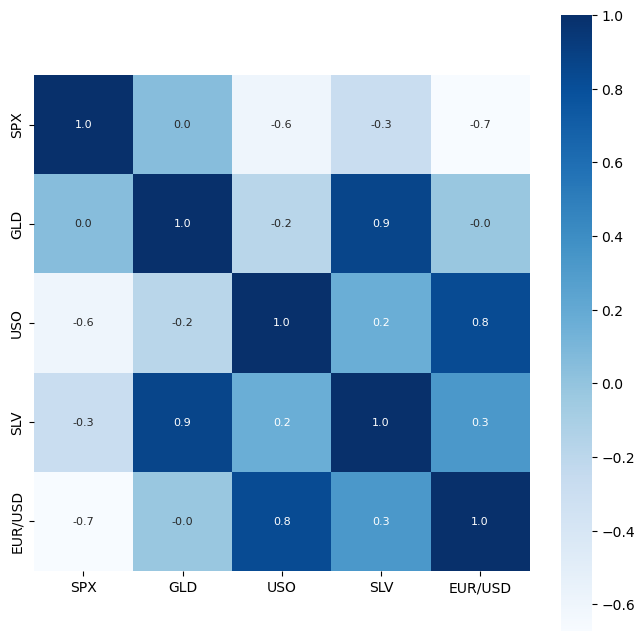

In [21]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square= True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap = "Blues")

In [23]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\avish\AppData\Local\Temp\ipykernel_20788\3487530419.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'], color='green')


<Axes: xlabel='GLD', ylabel='Density'>

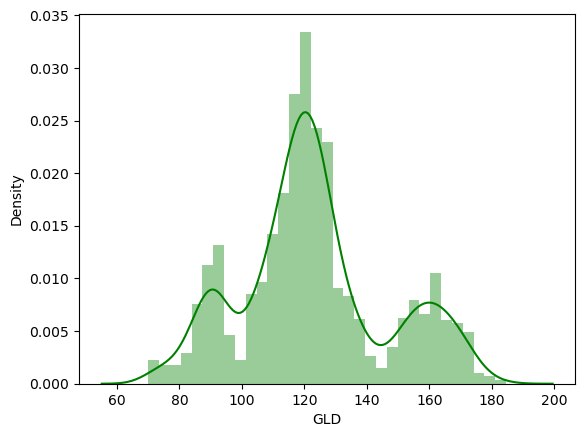

In [28]:
# Check the distribution of the gold price
sns.distplot(gold_data['GLD'], color='green')

Splitting the features and target

In [31]:
X = gold_data.drop(['Date', 'GLD'], axis = 1)
Y = gold_data['GLD']

In [32]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [33]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Train Test Split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

# Model Training

Random Forest Regressor

In [35]:
regressor = RandomForestRegressor(n_estimators=100)

In [36]:
# Training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

# Model Evaluation

In [37]:
# prediction on Test data
test_data_prediction = regressor.predict(X_test)

In [38]:
print(test_data_prediction)

[168.65219943  81.83739976 116.09669942 127.69970057 120.66010122
 154.74689709 150.47969783 126.1890001  117.30149871 125.97390065
 116.85350096 172.17980117 141.37979834 168.02159896 115.12289969
 117.49730049 137.16230347 169.98820076 159.6053034  158.03849978
 155.08299984 125.39799989 175.95219949 157.35760346 125.20100046
  93.65929994  77.46240017 120.78430028 119.01339889 167.51299999
  88.10000068 125.39200053  91.20120063 117.87250031 121.20499902
 136.44040032 115.42200145 115.34530092 145.99749974 106.90060102
 104.26200244  87.21969791 126.51550062 117.82000003 153.07379857
 119.70310027 108.36219992 108.16659872  93.21740008 127.07129781
  75.12260029 113.50279911 121.54570009 111.20699918 118.94019892
 120.8220995  159.33020029 166.89700001 146.72449659  85.92839878
  94.33990047  86.83459874  90.55220042 119.05040084 126.34250081
 127.46960002 168.46660055 122.2400993  117.37459903  98.78290029
 168.35790086 143.17869846 132.05570213 121.26930228 121.14729912
 119.90750

# R Squared Error

In [39]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print(f'R square error: ', error_score)

R square error:  0.989614967558294


# Compare the Actual values and Predicted value in a plot

In [40]:
Y_test = list(Y_test)

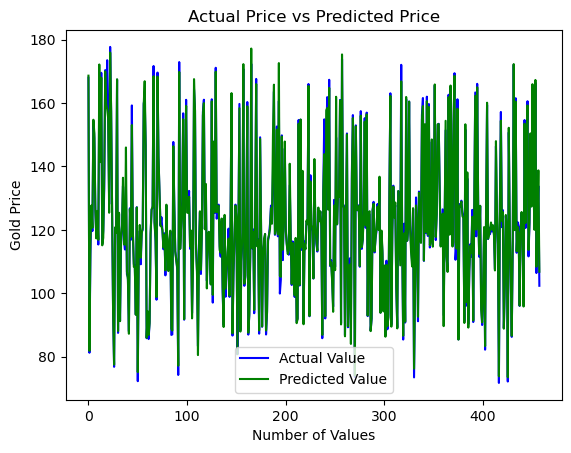

In [42]:
plt.plot(Y_test, color = "blue", label = "Actual Value")
plt.plot(test_data_prediction, color = "green", label = "Predicted Value")
plt.title("Actual Price vs Predicted Price")
plt.xlabel("Number of Values")
plt.ylabel("Gold Price")
plt.legend()
plt.show()